# Choix des variables explicatives 

**But du notebook :** réaliser des tests statistiques sur les variables issues de Bloomberg afin d'identifier celles pertinentes pour la régression. 

Deux conditions à vérifier : 

$-$ La variable explicative doit être utile pour expliquer la variable à expliquer, c'est-à-dire que *PD_1y* (la proba de défaut à 1 an) doit être corrélée à la variable. 

$-$ Pas de doublons entre les variables explicatives. Les variables explicatives choisies doivent être peu corrélées entre elles. 


---------------- 
# Résultats du notebook

Variables d'intérêt : Average Equity / Average Assets, Common Eqty / Tot Assets, Int Exp / Avg Int Bear Liab, Debt/EBITDA, EBITDA, Earnings Assets / Int Bear Liab, Debt / Common Equity, BCLASS Level 3 *(sont statistiquement significatives par rapport à PD_1y)*

**Variables d'intérêt moins les doublons : Common Eqty / Tot Assets, Debt/EBITDA, EBITDA, Earnings Assets / Int Bear Liab, Debt / Common Equity, BCLASS Level 3.** *(statistiquement significatives et peu corrélées entre elles)*

Variables d'intéret moins les doublons moins ceux avec bcp de valeurs manquantes : Common Eqty / Tot Assets, Debt / Common Equity, BCLASS Level 3 *(statistiquement significatives, peu corrélées entre elles et assez nombreuses dans le dataset)*

---------------------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
df = pd.read_csv('market_data_pd.csv',sep = ';')

In [33]:
df = df.drop(columns=['Unnamed: 0','Issuer Name','Maturity','Ask Price', 'Mid Price','Bid Price','Ticker_x','Ticker_y','Reference Security','Cpn'])

In [34]:
df.head()
#potentielles variables explicatives, et variable expliquée : PD_1y

,Average Equity / Average Assets,Common Eqty / Tot Assets,Debt / Common Equity,Debt/Assets,Debt/EBITDA,EBITDA,Int Exp / Avg Int Bear Liab,Tot Debt / Tot Capital,Tot Loans to Tot Assets,Tot Risk-Based Cap,Earnings Assets / Int Bear Liab,Total Expenses to Average Earning Assets,PD_1y,BCLASS Level 1,BCLASS Level 2,BCLASS Level 3,BCLASS Level 4
0,4.73005,4.84431,684.499,33.1593,NaN,NaN,NaN,87.2526,72.7382,275.5,NaN,NaN,0.053266,Corporate,Financial Institutions,Banking,Banking
1,18.91500,17.15800,351.535,60.3164,1.61252,70.221,NaN,77.8533,NaN,NaN,NaN,NaN,0.068537,Corporate,Industrial,Consumer Cyclical,Retailers
2,18.91500,17.15800,351.535,60.3164,1.61252,70.221,NaN,77.8533,NaN,NaN,NaN,NaN,0.119209,Corporate,Industrial,Consumer Cyclical,Retailers
3,18.77330,19.24570,410.513,79.0061,NaN,NaN,3.78296,80.4119,NaN,NaN,NaN,NaN,0.030968,Corporate,Industrial,Basic Industry,Metals and Mining
4,18.77330,19.24570,410.513,79.0061,NaN,NaN,3.78296,80.4119,NaN,NaN,NaN,NaN,0.016911,Corporate,Industrial,Basic Industry,Metals and Mining


In [32]:
df.shape

(603, 18)

On distingue dans ce notebook les variables quantitatives (*partie I*) et les variables qualitatives (*partie II*). Les tests d'indépendance de ces variables sont différents. 


# I. VARIABLES QUANTITATIVES

# Observations des corrélations

In [7]:
corr_df = df.corr(method='spearman')
print("The correlation DataFrame is:")
print(corr_df, "\n")

The correlation DataFrame is:
                                          Unnamed: 0  \
Unnamed: 0                                  1.000000   
Average Equity / Average Assets             0.043558   
Common Eqty / Tot Assets                    0.040980   
Debt / Common Equity                       -0.083539   
Debt/Assets                                -0.143390   
Debt/EBITDA                                 0.155823   
EBITDA                                     -0.144669   
Int Exp / Avg Int Bear Liab                 0.094777   
Tot Debt / Tot Capital                     -0.060841   
Tot Loans to Tot Assets                     0.166982   
Tot Risk-Based Cap                         -0.195185   
Earnings Assets / Int Bear Liab             0.338208   
Total Expenses to Average Earning Assets         NaN   
PD_1y                                       0.051336   

                                          Average Equity / Average Assets  \
Unnamed: 0                                          

In [8]:
corr = abs(corr_df)

In [9]:
corr

,Unnamed: 0,Average Equity / Average Assets,Common Eqty / Tot Assets,Debt / Common Equity,Debt/Assets,Debt/EBITDA,EBITDA,Int Exp / Avg Int Bear Liab,Tot Debt / Tot Capital,Tot Loans to Tot Assets,Tot Risk-Based Cap,Earnings Assets / Int Bear Liab,Total Expenses to Average Earning Assets,PD_1y
Unnamed: 0,1.000000,0.043558,0.040980,0.083539,0.143390,0.155823,0.144669,0.094777,0.060841,0.166982,0.195185,0.338208,NaN,0.051336
Average Equity / Average Assets,0.043558,1.000000,0.987812,0.689132,0.042793,0.293401,0.041832,0.161346,0.720007,0.568100,0.272852,0.301252,NaN,0.100839
Common Eqty / Tot Assets,0.040980,0.987812,1.000000,0.688037,0.027679,0.313084,0.113774,0.147853,0.722840,0.574501,0.285839,0.299045,NaN,0.125992
Debt / Common Equity,0.083539,0.689132,0.688037,1.000000,0.464587,0.480710,0.059226,0.307918,0.989464,0.289152,0.081165,0.170163,NaN,0.093468
Debt/Assets,0.143390,0.042793,0.027679,0.464587,1.000000,0.478818,0.143173,0.485322,0.496331,0.530347,0.500243,0.220211,NaN,0.012689
Debt/EBITDA,0.155823,0.293401,0.313084,0.480710,0.478818,1.000000,0.394820,0.856492,0.447813,1.000000,NaN,0.220339,NaN,0.423564
EBITDA,0.144669,0.041832,0.113774,0.059226,0.143173,0.394820,1.000000,0.419162,0.145824,0.221477,0.980861,0.019827,NaN,0.442049
Int Exp / Avg Int Bear Liab,0.094777,0.161346,0.147853,0.307918,0.485322,0.856492,0.419162,1.000000,0.344274,0.530370,0.466124,0.011069,NaN,0.185163
Tot Debt / Tot Capital,0.060841,0.720007,0.722840,0.989464,0.496331,0.447813,0.145824,0.344274,1.000000,0.229547,0.182815,0.147901,NaN,0.026630
Tot Loans to Tot Assets,0.166982,0.568100,0.574501,0.289152,0.530347,1.000000,0.221477,0.530370,0.229547,1.000000,0.621060,0.316195,NaN,0.059206


Text(0.5, 1.0, 'Matrice de corrélation des variables')

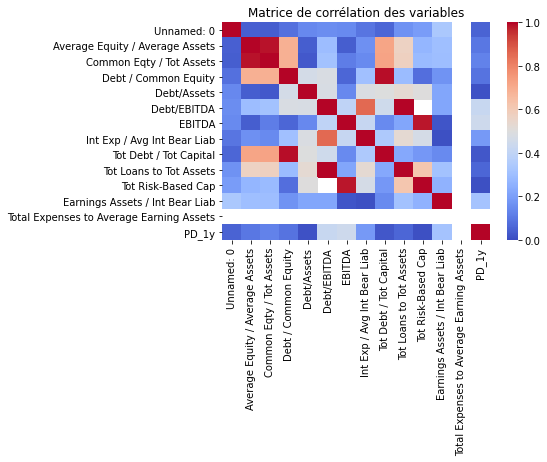

In [10]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=0.00, vmax=1,cmap='coolwarm')

plt.title('Matrice de corrélation des variables')

# Tests statistiques 

**3 tests identifiés : Pearson, Spearman et Kendall.**

Hypothèse $H_0$ *:* $\rho = 0$ *(indépendance). VS* $H_1$ *:*  $\rho \ne 0$ *(non indépendance)*

**p-value :** Si $\alpha_{obs} < \alpha_{seuil}$, on rejette l'hypothèse $H_0$ d'indépendance.

$-$ **Pearson :** suppose que les échantillons suivent une loi normale *(limite de ce test)*. Relation linéaire.

$-$ **Spearman & Kendall :** *ok* Relation monotone

In [11]:
from scipy import stats
from scipy.stats.stats import *

In [12]:
colonnes = ['Average Equity / Average Assets','Common Eqty / Tot Assets', 'Debt / Common Equity', 'Debt/Assets','Debt/EBITDA', 'EBITDA', 'Int Exp / Avg Int Bear Liab','Tot Debt / Tot Capital', 'Tot Loans to Tot Assets','Tot Risk-Based Cap', 'Earnings Assets / Int Bear Liab']

# I. Pertinence sur la variable à expliquer 

In [13]:
corr2= df.corr(method='spearman')
corr2["PD_1y"]

Unnamed: 0                                  0.051336
Average Equity / Average Assets            -0.100839
Common Eqty / Tot Assets                   -0.125992
Debt / Common Equity                       -0.093468
Debt/Assets                                 0.012689
Debt/EBITDA                                 0.423564
EBITDA                                     -0.442049
Int Exp / Avg Int Bear Liab                 0.185163
Tot Debt / Tot Capital                     -0.026630
Tot Loans to Tot Assets                     0.059206
Tot Risk-Based Cap                         -0.011430
Earnings Assets / Int Bear Liab             0.319078
Total Expenses to Average Earning Assets         NaN
PD_1y                                       1.000000
Name: PD_1y, dtype: float64

## a. Pearson

In [14]:
#PEARSON

print("TEST DE PEARSON")

for col in colonnes :
    
    print("###### \n ")
    
    df_bis = df[['PD_1y',col]].dropna(how = 'any') 
    
    print(col)
    print(stats.pearsonr(df_bis['PD_1y'],df_bis[col]))

TEST DE PEARSON
###### 
 
Average Equity / Average Assets
(-0.33183321241864644, 9.304420761667452e-16)
###### 
 
Common Eqty / Tot Assets
(-0.37197802268935565, 5.552082881153963e-20)
###### 
 
Debt / Common Equity
(-0.045553657741433606, 0.29021530138833074)
###### 
 
Debt/Assets
(0.12794275356918414, 0.002332604896425352)
###### 
 
Debt/EBITDA
(0.03171816592022272, 0.6051898292609911)
###### 
 
EBITDA
(-0.06900372404753366, 0.19779508151915656)
###### 
 
Int Exp / Avg Int Bear Liab
(0.37760320640192085, 9.910600995886602e-05)
###### 
 
Tot Debt / Tot Capital
(0.5851865463526325, 4.883909980009774e-53)
###### 
 
Tot Loans to Tot Assets
(0.018119455372958757, 0.8076522703413777)
###### 
 
Tot Risk-Based Cap
(-0.05094079608431323, 0.5171198312144145)
###### 
 
Earnings Assets / Int Bear Liab
(0.10287803892772704, 0.17928473106944443)


**Observation des p-values :** Average Equity / Average Assets (0%), Common Eqty / Tot Assets (0%), Debt/Assets (0%), Int Exp / Avg Int Bear Liab (0%), Tot Debt / Tot Capital (0%).


## b. Spearman 

In [15]:
#SPEARMAN

print("TEST DE SPEARMAN")

for col in colonnes :
    
    
    print("###### \n ")
    df_bis = df[['PD_1y',col]].dropna(how = 'any') 
    
    print(col)
    print(stats.spearmanr(df_bis['PD_1y'],df_bis[col]))

TEST DE SPEARMAN
###### 
 
Average Equity / Average Assets
SpearmanrResult(correlation=-0.10083915648604327, pvalue=0.0173848230477836)
###### 
 
Common Eqty / Tot Assets
SpearmanrResult(correlation=-0.12599213339400966, pvalue=0.0026986457515118883)
###### 
 
Debt / Common Equity
SpearmanrResult(correlation=-0.09346824393758313, pvalue=0.02972407063817281)
###### 
 
Debt/Assets
SpearmanrResult(correlation=0.012688588269282297, pvalue=0.7636578800452172)
###### 
 
Debt/EBITDA
SpearmanrResult(correlation=0.42356360432932316, pvalue=4.306361039659545e-13)
###### 
 
EBITDA
SpearmanrResult(correlation=-0.44204932696910537, pvalue=3.553123385504237e-18)
###### 
 
Int Exp / Avg Int Bear Liab
SpearmanrResult(correlation=0.18516348829304538, pvalue=0.06377181369807086)
###### 
 
Tot Debt / Tot Capital
SpearmanrResult(correlation=-0.02662999577211096, pvalue=0.5283191391553385)
###### 
 
Tot Loans to Tot Assets
SpearmanrResult(correlation=0.05920642744725068, pvalue=0.4259504803269808)
###### 


**Observations des p-values :** Average Equity / Average Assets (1%), Common Eqty / Tot Assets (0%), Debt / Common Equity (3%), Debt/EBITDA (0%), EBITDA (0%), Int Exp / Avg Int Bear Liab (6%), Earnings Assets / Int Bear Liab (0%).




## c. Kendall 

In [16]:
#KENDALL

print("TEST DE KENDALL")

for col in colonnes :
    
    print("###### \n ") 
    
    df_bis = df[['PD_1y',col]].dropna(how = 'any') 
    
    print(col)
    print(stats.kendalltau(df_bis['PD_1y'],df_bis[col]))

TEST DE KENDALL
###### 
 
Average Equity / Average Assets
KendalltauResult(correlation=-0.06811521624730987, pvalue=0.017018916419771046)
###### 
 
Common Eqty / Tot Assets
KendalltauResult(correlation=-0.08571276084931852, pvalue=0.002464026545693127)
###### 
 
Debt / Common Equity
KendalltauResult(correlation=-0.0629493891772008, pvalue=0.029670639982019593)
###### 
 
Debt/Assets
KendalltauResult(correlation=0.013452921869459693, pvalue=0.6349629578112135)
###### 
 
Debt/EBITDA
KendalltauResult(correlation=0.2923987362597523, pvalue=1.4405215197678771e-12)
###### 
 
EBITDA
KendalltauResult(correlation=-0.30749329383311835, pvalue=1.521249352381338e-17)
###### 
 
Int Exp / Avg Int Bear Liab
KendalltauResult(correlation=0.11412483786658614, pvalue=0.10096234013324372)
###### 
 
Tot Debt / Tot Capital
KendalltauResult(correlation=-0.01838099246703489, pvalue=0.5169362144278931)
###### 
 
Tot Loans to Tot Assets
KendalltauResult(correlation=0.030902948392377304, pvalue=0.5482112175513707

**Observation des p-values :** Average Equity / Average Assets (2é%), Common Eqty / Tot Assets (0%), Debt / Common Equity (3%), Debt/EBITDA (0%), EBITDA (0%), Int Exp / Avg Int Bear Liab (10%), Earnings Assets / Int Bear Liab (0%).

**CONCLUSION**

On compare les résultats des 3 tests. Les variables qu'on retient sont celles pour lesquelles on rejette l'hypothèse d'indépendance avec la variable expliquée, ie celles avec une p-value très faible.


On choisit **Average Equity / Average Assets, Common Eqty / Tot Assets, Int Exp / Avg Int Bear Liab, Debt/EBITDA, EBITDA, Earnings Assets / Int Bear Liab, Debt / Common Equity**.

# II. Corrélations entre variables explicatives

In [17]:
var = df[["Average Equity / Average Assets","Common Eqty / Tot Assets","Debt/EBITDA","EBITDA","Earnings Assets / Int Bear Liab","Int Exp / Avg Int Bear Liab","Debt / Common Equity"]]

In [18]:
var

,Average Equity / Average Assets,Common Eqty / Tot Assets,Debt/EBITDA,EBITDA,Earnings Assets / Int Bear Liab,Int Exp / Avg Int Bear Liab,Debt / Common Equity
0,4.73005,4.84431,NaN,NaN,NaN,NaN,684.499
1,18.91500,17.15800,1.61252,70.221,NaN,NaN,351.535
2,18.91500,17.15800,1.61252,70.221,NaN,NaN,351.535
3,18.77330,19.24570,NaN,NaN,NaN,3.78296,410.513
4,18.77330,19.24570,NaN,NaN,NaN,3.78296,410.513
...,...,...,...,...,...,...,...
598,6.50472,6.05127,NaN,NaN,194.614,NaN,434.356
599,6.50472,6.05127,NaN,NaN,194.614,NaN,434.356
600,6.50472,6.05127,NaN,NaN,194.614,NaN,434.356
601,6.50472,6.05127,NaN,NaN,194.614,NaN,434.356


In [19]:
colonnes2 = ["Average Equity / Average Assets","Common Eqty / Tot Assets","Debt/EBITDA","EBITDA","Earnings Assets / Int Bear Liab","Int Exp / Avg Int Bear Liab","Debt / Common Equity"]

In [20]:
var.isnull().sum(axis = 0)

Average Equity / Average Assets     37
Common Eqty / Tot Assets            28
Debt/EBITDA                        329
EBITDA                             243
Earnings Assets / Int Bear Liab    431
Int Exp / Avg Int Bear Liab        502
Debt / Common Equity                52
dtype: int64

Problème des valeurs manquantes : *Int Exp / Avg Int Bear Liab*, *Debt/EBITDA*, *Earnings Assets / Int Bear Liab* et *EBITDA* ont énormèment de valeurs manquantes. Cela sera problématique ensuite pour le réseau de neurones.

## 1) en gardant toutes les variables

In [21]:
corr_var = var.corr(method='spearman')
print("The correlation DataFrame is:")
print(corr_var, "\n")

The correlation DataFrame is:
                                 Average Equity / Average Assets  \
Average Equity / Average Assets                         1.000000   
Common Eqty / Tot Assets                                0.987812   
Debt/EBITDA                                            -0.293401   
EBITDA                                                  0.041832   
Earnings Assets / Int Bear Liab                        -0.301252   
Int Exp / Avg Int Bear Liab                            -0.161346   
Debt / Common Equity                                   -0.689132   

                                 Common Eqty / Tot Assets  Debt/EBITDA  \
Average Equity / Average Assets                  0.987812    -0.293401   
Common Eqty / Tot Assets                         1.000000    -0.313084   
Debt/EBITDA                                     -0.313084     1.000000   
EBITDA                                           0.113774    -0.394820   
Earnings Assets / Int Bear Liab                 -0.2990

Text(0.5, 1.0, 'Matrice de corrélation des variables')

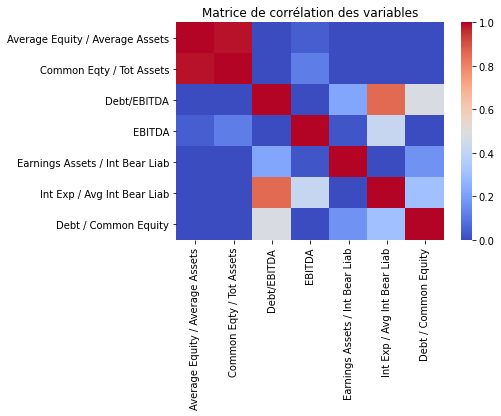

In [22]:
sns.heatmap(corr_var, xticklabels=corr_var.columns, yticklabels=corr_var.columns, vmin=0.00, vmax=1,cmap='coolwarm')

plt.title('Matrice de corrélation des variables')

Doublon entre Common Eqty / Tot Aassets et Average Equity / Average Assets, et Int Exp / avg int bear liab et Debt/EBITDA.

## a. Spearman

In [24]:
print("TEST DE SPEARMAN")

for col1 in colonnes2 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes2 : 
        
        if col1 != col2 :
    
            df_bis = var[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.spearmanr(df_bis[col1],df_bis[col2]))

TEST DE SPEARMAN

##############################

VAR = Average Equity / Average Assets
----
Common Eqty / Tot Assets
SpearmanrResult(correlation=0.9878115933767302, pvalue=0.0)
----
Debt/EBITDA
SpearmanrResult(correlation=-0.29340050505477056, pvalue=8.820469754265955e-07)
----
EBITDA
SpearmanrResult(correlation=0.041832483261338656, pvalue=0.4313624608972736)
----
Earnings Assets / Int Bear Liab
SpearmanrResult(correlation=-0.3012518904385817, pvalue=6.551744059629853e-05)
----
Int Exp / Avg Int Bear Liab
SpearmanrResult(correlation=-0.16134648526877357, pvalue=0.10698179672212228)
----
Debt / Common Equity
SpearmanrResult(correlation=-0.6891318405090693, pvalue=7.5952611177317065e-78)

##############################

VAR = Common Eqty / Tot Assets
----
Average Equity / Average Assets
SpearmanrResult(correlation=0.9878115933767302, pvalue=0.0)
----
Debt/EBITDA
SpearmanrResult(correlation=-0.3130843139749751, pvalue=1.2070480996713414e-07)
----
EBITDA
SpearmanrResult(correlation=0.113

## b. Kendall

In [25]:
print("TEST DE KENDALL")

for col1 in colonnes2 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes2 : 
        
        if col1 != col2 :
    
            df_bis = var[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.kendalltau(df_bis[col1],df_bis[col2]))

TEST DE KENDALL

##############################

VAR = Average Equity / Average Assets
----
Common Eqty / Tot Assets
KendalltauResult(correlation=0.9364807737404851, pvalue=3.0302007030672375e-237)
----
Debt/EBITDA
KendalltauResult(correlation=-0.20483333333333337, pvalue=7.491209541395086e-07)
----
EBITDA
KendalltauResult(correlation=0.034860733859432, pvalue=0.3334158784744027)
----
Earnings Assets / Int Bear Liab
KendalltauResult(correlation=-0.20428148485538605, pvalue=0.0002417400358354845)
----
Int Exp / Avg Int Bear Liab
KendalltauResult(correlation=-0.14638297872340425, pvalue=0.04131270224564423)
----
Debt / Common Equity
KendalltauResult(correlation=-0.5585870832214281, pvalue=2.8766608970532025e-82)

##############################

VAR = Common Eqty / Tot Assets
----
Average Equity / Average Assets
KendalltauResult(correlation=0.9364807737404851, pvalue=3.0302007030672375e-237)
----
Debt/EBITDA
KendalltauResult(correlation=-0.224772511204672, pvalue=4.711030196540184e-08)
--

## 2) en ne gardant que les variables avec peu de NaN

In [26]:
var2 = df[["Average Equity / Average Assets","Common Eqty / Tot Assets","Debt / Common Equity"]]

In [27]:
var2.isnull().sum(axis = 0)

Average Equity / Average Assets    37
Common Eqty / Tot Assets           28
Debt / Common Equity               52
dtype: int64

Text(0.5, 1.0, 'Matrice de corrélation des variables')

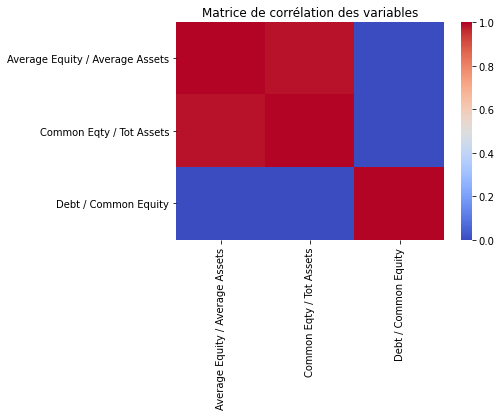

In [28]:
corr_var2 = var2.corr(method='spearman')
sns.heatmap(corr_var2, xticklabels=corr_var2.columns, yticklabels=corr_var2.columns, vmin=0.00, vmax=1,cmap='coolwarm')
plt.title('Matrice de corrélation des variables')

In [30]:
colonnes3 = ["Average Equity / Average Assets","Common Eqty / Tot Assets","Debt / Common Equity"]

print("TEST DE SPEARMAN")

for col1 in colonnes3 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes3 : 
        
        if col1 != col2 :
    
            df_bis = var2[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.spearmanr(df_bis[col1],df_bis[col2]))

TEST DE SPEARMAN

##############################

VAR = Average Equity / Average Assets
----
Common Eqty / Tot Assets
SpearmanrResult(correlation=0.9878115933767302, pvalue=0.0)
----
Debt / Common Equity
SpearmanrResult(correlation=-0.6891318405090693, pvalue=7.5952611177317065e-78)

##############################

VAR = Common Eqty / Tot Assets
----
Average Equity / Average Assets
SpearmanrResult(correlation=0.9878115933767302, pvalue=0.0)
----
Debt / Common Equity
SpearmanrResult(correlation=-0.6880372119803523, pvalue=1.7420150310955214e-78)

##############################

VAR = Debt / Common Equity
----
Average Equity / Average Assets
SpearmanrResult(correlation=-0.6891318405090693, pvalue=7.5952611177317065e-78)
----
Common Eqty / Tot Assets
SpearmanrResult(correlation=-0.6880372119803523, pvalue=1.7420150310955214e-78)


In [31]:
print("TEST DE KENDALL")

for col1 in colonnes3 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes3 : 
        
        if col1 != col2 :
    
            df_bis = var2[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.kendalltau(df_bis[col1],df_bis[col2]))

TEST DE KENDALL

##############################

VAR = Average Equity / Average Assets
----
Common Eqty / Tot Assets
KendalltauResult(correlation=0.9364807737404851, pvalue=3.0302007030672375e-237)
----
Debt / Common Equity
KendalltauResult(correlation=-0.5585870832214281, pvalue=2.8766608970532025e-82)

##############################

VAR = Common Eqty / Tot Assets
----
Average Equity / Average Assets
KendalltauResult(correlation=0.9364807737404851, pvalue=3.0302007030672375e-237)
----
Debt / Common Equity
KendalltauResult(correlation=-0.5680775533463505, pvalue=3.783770773858007e-86)

##############################

VAR = Debt / Common Equity
----
Average Equity / Average Assets
KendalltauResult(correlation=-0.5585870832214282, pvalue=2.8766608970532025e-82)
----
Common Eqty / Tot Assets
KendalltauResult(correlation=-0.5680775533463505, pvalue=3.783770773858007e-86)


In [32]:
#PEARSON

print("TEST DE PEARSON")

for col1 in colonnes3 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes3 : 
        
        if col1 != col2 :
    
            df_bis = var2[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.pearsonr(df_bis[col1],df_bis[col2]))

TEST DE PEARSON

##############################

VAR = Average Equity / Average Assets
----
Common Eqty / Tot Assets
(0.9870870450730153, 0.0)
----
Debt / Common Equity
(-0.13059673323875504, 0.0022725574946073092)

##############################

VAR = Common Eqty / Tot Assets
----
Average Equity / Average Assets
(0.9870870450730153, 0.0)
----
Debt / Common Equity
(-0.1252560524354834, 0.0032283612348077287)

##############################

VAR = Debt / Common Equity
----
Average Equity / Average Assets
(-0.13059673323875504, 0.0022725574946073092)
----
Common Eqty / Tot Assets
(-0.1252560524354834, 0.0032283612348077287)


On retrouve le doublon entre Common Eqty / Tot Aassets et Average Equity / Average Assets.

### CONCLUSION SUR LES VARIABLES QUANTI 

Variables d'intérêt : Average Equity / Average Assets, Common Eqty / Tot Assets, Int Exp / Avg Int Bear Liab (0%), Debt/EBITDA, EBITDA, Earnings Assets / Int Bear Liab, Debt / Common Equity 

**Variables d'intérêt moins les doublons : Common Eqty / Tot Assets, Debt/EBITDA, EBITDA, Earnings Assets / Int Bear Liab, Debt / Common Equity.**

Variables d'intéret moins les doublons moins ceux avec bcp de valeurs manquantes : Common Eqty / Tot Assets, Debt / Common Equity

# Autres fonctions 

*inutile*

In [72]:
#renvoyer tous les duos avec une corrélation au dessus d'un certain seuil 

def high_corr(corr_df, seuil) : 
    
    duos = []
    
    col = np.array(corr_df.columns) 
    corr = corr_df.to_numpy()
    corr = np.abs(corr)
    
    for i in range(0,len(corr)) : 
        for j in range(0,i) : 
            
            if corr[i][j] > seuil : 
                
                duos.append(col[i] + " AND " + col[j]) 
                
    return duos 

In [73]:
def low_corr(corr_df, seuil) : 
    
    duos = []
    
    col = np.array(corr_df.columns) 
    corr = corr_df.to_numpy()
    corr = np.abs(corr)
    
    for i in range(0,len(corr)) : 
        for j in range(0,i) : 
            
            if corr[i][j] <= seuil : 
                
                duos.append(col[i] + " AND " + col[j]) 
                
    return duos 

# II. VARIABLES QUALITATIVES

# Etude des secteurs 

On récupère de Bloom 4 variables relatives aux secteurs des bonds, lesquels sont inclus les uns dans les autres (toutes les observations d'une même modalité de la variable n a la même valeur pour la variable n-1). La précision augmente avec le numéro de la variable. **Nous cherchons l'échelle la plus pertinente (doit être ni trop large ni trop précise)**. 

Pour cela, nous allons réaliser des tests d'indépendance entre la variable d'intérêt *PD_1y* et chaque variable sectorielle. Nous garderons la variable sectorielle la plus corrélée à la variable d'intérêt. 

**Identification de plusieurs tests pertinents :** Nous cherchons donc un test d'indépendance entre une variable qualitative et une variable quantitative (à plus de 2 groupes). 

$-$ test ANOVA (paramétrique, suppose que les résidus suivent une loi normale) 

$-$ test de Kruskall-Wallis (non paramétrique) 

In [35]:
quali = df[["PD_1y","BCLASS Level 1","BCLASS Level 2","BCLASS Level 3","BCLASS Level 4"]]

In [36]:
quali

,PD_1y,BCLASS Level 1,BCLASS Level 2,BCLASS Level 3,BCLASS Level 4
0,0.053266,Corporate,Financial Institutions,Banking,Banking
1,0.068537,Corporate,Industrial,Consumer Cyclical,Retailers
2,0.119209,Corporate,Industrial,Consumer Cyclical,Retailers
3,0.030968,Corporate,Industrial,Basic Industry,Metals and Mining
4,0.016911,Corporate,Industrial,Basic Industry,Metals and Mining
...,...,...,...,...,...
598,0.018921,Corporate,Financial Institutions,Banking,Banking
599,0.008796,Corporate,Financial Institutions,Banking,Banking
600,0.035679,Corporate,Financial Institutions,Banking,Banking
601,0.020427,Corporate,Financial Institutions,Banking,Banking


In [38]:
quali_2 = quali.dropna(how = 'any')
quali_2
#aucune valeur manquante sur ce dataset, tant mieux 

,PD_1y,BCLASS Level 1,BCLASS Level 2,BCLASS Level 3,BCLASS Level 4
0,0.053266,Corporate,Financial Institutions,Banking,Banking
1,0.068537,Corporate,Industrial,Consumer Cyclical,Retailers
2,0.119209,Corporate,Industrial,Consumer Cyclical,Retailers
3,0.030968,Corporate,Industrial,Basic Industry,Metals and Mining
4,0.016911,Corporate,Industrial,Basic Industry,Metals and Mining
...,...,...,...,...,...
598,0.018921,Corporate,Financial Institutions,Banking,Banking
599,0.008796,Corporate,Financial Institutions,Banking,Banking
600,0.035679,Corporate,Financial Institutions,Banking,Banking
601,0.020427,Corporate,Financial Institutions,Banking,Banking


In [39]:
quali_2.rename(columns={'BCLASS Level 1':'Level1'}, inplace=True)
quali_2.rename(columns={'BCLASS Level 2':'Level2'}, inplace=True)
quali_2.rename(columns={'BCLASS Level 3':'Level3'}, inplace=True)
quali_2.rename(columns={'BCLASS Level 4':'Level4'}, inplace=True)

C:\Users\mathilde.binet\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


## 1. Etudes graphiques 

In [40]:
print("Level 1, il y a", len(quali_2['Level1'].unique()), " modalités.")
print("Level 2, il y a", len(quali_2['Level2'].unique()), " modalités.")
print("Level 3, il y a", len(quali_2['Level3'].unique()), " modalités.")
print("Level 4, il y a", len(quali_2['Level4'].unique()), " modalités.")

Level 1, il y a 3  modalités.
Level 2, il y a 7  modalités.
Level 3, il y a 22  modalités.
Level 4, il y a 43  modalités.


In [41]:
print("\n########### LEVEL 1 ###########")
print(quali_2['Level1'].value_counts())
print("\n########### LEVEL 2 ###########")
print(quali_2['Level2'].value_counts())
print("\n########### LEVEL 3 ###########")
print(quali_2['Level3'].value_counts())
print("\n########### LEVEL 4 ###########")
print(quali_2['Level4'].value_counts())


########### LEVEL 1 ###########
Corporate             554
Government-Related     28
Securitized            11
Name: Level1, dtype: int64

########### LEVEL 2 ###########
Financial Institutions    282
Industrial                260
Utility                    12
Local Authority            12
Agency                     12
Covered                    11
Supranational               4
Name: Level2, dtype: int64

########### LEVEL 3 ###########
Banking                              155
Other Financial                       68
Consumer Non-Cyclical                 67
Transportation                        48
Insurance                             45
Capital Goods                         33
Communications                        27
Technology                            27
Consumer Cyclical                     26
Basic Industry                        24
Local Authority                       12
Government Owned. No Guarantee        12
Mortgage Assets                       11
REITs                     

En diminuant l'échelle (augmenter le level), certaines classes sont de moins en moins peuplées (une observation). Pas très fiable, il faudrait faire avec bien plus de données.

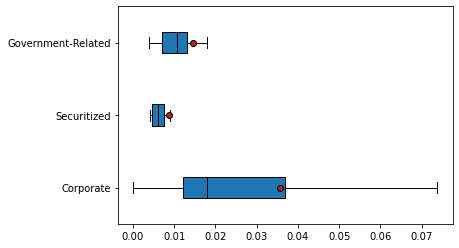

In [42]:
#LEVEL 1
modalites = quali_2['Level1'].unique()

groupes = []
for m in modalites:
    groupes.append(quali_2[quali_2['Level1']==m]["PD_1y"])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

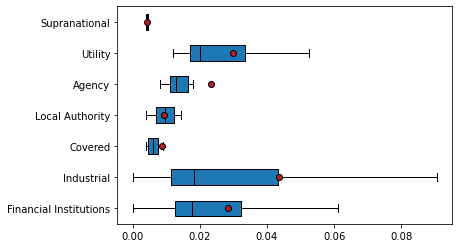

In [43]:
#LEVEL 2
modalites = quali_2['Level2'].unique()

groupes = []
for m in modalites:
    groupes.append(quali_2[quali_2['Level2']==m]["PD_1y"])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

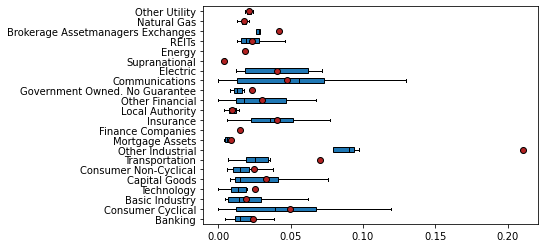

In [44]:
#LEVEL 3
modalites = quali_2['Level3'].unique()

groupes = []
for m in modalites:
    groupes.append(quali_2[quali_2['Level3']==m]["PD_1y"])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

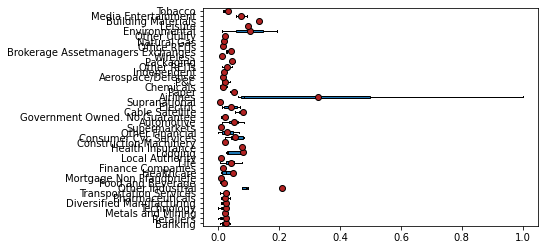

In [45]:
#LEVEL 4
modalites = quali_2['Level4'].unique()

groupes = []
for m in modalites:
    groupes.append(quali_2[quali_2['Level4']==m]["PD_1y"])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

## 2. ANOVA / Test F 

ANOVA (ou analyse de la variance) permet de déterminer si les moyennes des groupes sont égales. ANOVA utilise des tests F (Fischer) pour tester statistiquement l'égalité des moyennes. La **statistique F** est un ratio de deux écart-types : variation entre les moyennes d'échantillonage sur variation à l'intérieur des échantillons.

**Hypothèse** $H_0$ *:* $M_1 = M_2 = \ ... \ = M_k$ *(indépendance). VS* $H_1$ *:*  il existe au moins un couple (i,j) tel que $M_i \ne M_j$ *(non indépendance)*

**p-value :** Si $Pr_{obs} < Pr_{seuil}$, on rejette l'hypothèse $H_0$ d'indépendance.


--------

**Limites :** 
Il y a 3 hypothèses à vérifier : les résidus sont indépendants, les résidus suivent une loi Normale de moyenne 0 et de variance = variance résiduelle, les résidus sont homogènes.

--------

In [46]:
import statsmodels.formula.api
import statsmodels.api

In [47]:
fit1 = statsmodels.formula.api.ols('PD_1y ~ Level1', data = quali_2).fit()

#table = statsmodels.api.stats.anova_lm(fit,robust = 'hc3')
table1 = statsmodels.api.stats.anova_lm(fit1)
table1

,df,sum_sq,mean_sq,F,PR(>F)
Level1,2.0,0.018841,0.009421,1.839102,0.15987
Residual,590.0,3.022225,0.005122,NaN,NaN


In [48]:
fit2 = statsmodels.formula.api.ols('PD_1y ~ Level2', data = quali_2).fit()

#table = statsmodels.api.stats.anova_lm(fit,robust = 'hc3') #robuste à l'hétéroscédasticité 
table2 = statsmodels.api.stats.anova_lm(fit2)
table2

,df,sum_sq,mean_sq,F,PR(>F)
Level2,6.0,0.051938,0.008656,1.697028,0.11932
Residual,586.0,2.989128,0.005101,NaN,NaN


In [49]:
fit3 = statsmodels.formula.api.ols('PD_1y ~ Level3', data = quali_2).fit()

table3 = statsmodels.api.stats.anova_lm(fit3,robust = 'hc3')
#table3 = statsmodels.api.stats.anova_lm(fit3)
table3

,df,sum_sq,mean_sq,F,PR(>F)
Level3,21.0,0.345325,0.016444,3.483106,3.572487e-07
Residual,571.0,2.695741,0.004721,NaN,NaN


In [50]:
fit4 = statsmodels.formula.api.ols('PD_1y ~ Level4', data = quali_2).fit()

table4 = statsmodels.api.stats.anova_lm(fit4,robust = 'hc3')
#table4 = statsmodels.api.stats.anova_lm(fit4)
table4

,df,sum_sq,mean_sq,F,PR(>F)
Level4,42.0,0.968679,0.023064,6.120996,1.140532e-25
Residual,550.0,2.072388,0.003768,NaN,NaN


Les secteurs pris aux échelles 3 et 4 sont statistiquement significatifs. 

Le principe du test de Kruskall-Wallis est identique, avec des hypothèses moins restrictives. 

## 3. Test de Kruskall-Wallis 

Il s'agit d'un test non paramétrique à utiliser lorsque l'on est en présence de k échantillons indépendants, afin de déterminer si les échantillons proviennent d'une même population ou si au moins un échantillon provient d'une population différente des autres. 


$k$ échantillons = $k$ groupes formés par la modalité de la variable. On compare les distributions des groupes pour voir s'ils sont distribués pareillement.

**Hypothèse** $H_0$ *:* $M_1 = M_2 = \ ... \ = M_k$ *(indépendance). VS* $H_1$ *:*  il existe au moins un couple (i,j) tel que $M_i \ne M_j$ *(non indépendance)*

**p-value :** Si $\alpha_{obs} < \alpha_{seuil}$, on rejette l'hypothèse $H_0$ d'indépendance.


In [51]:
from scipy import stats

In [52]:
#LEVEL 1
arr = []
for sector in quali_2['Level1'].unique() : 
    arr.append(quali_2[quali_2["Level1"] == sector]["PD_1y"].values)

stats.mstats.kruskalwallis(arr[0],arr[1],arr[2])

KruskalResult(statistic=42.349630422483735, pvalue=6.366409918910258e-10)

In [53]:
#LEVEL 2
arr = []
for sector in quali_2['Level2'].unique() :     
    arr.append(quali_2[quali_2["Level2"] == sector]["PD_1y"].values)

stats.mstats.kruskalwallis(arr[0],arr[1],arr[2],arr[3],arr[4],arr[5],arr[6])

KruskalResult(statistic=49.73843801059403, pvalue=5.304207818518009e-09)

In [54]:
#LEVEL 3
arr = []
for sector in quali_2['Level3'].unique() :     
    arr.append(quali_2[quali_2["Level3"] == sector]["PD_1y"].values)

stats.mstats.kruskalwallis(arr[0],arr[1],arr[2],arr[3],arr[4],arr[5],arr[6],arr[7],arr[8],arr[9],arr[10],arr[11],arr[12],arr[13],arr[14],arr[15],arr[16],arr[17],arr[18],arr[19],arr[20],arr[21])

KruskalResult(statistic=119.99223472884972, pvalue=7.164257798080409e-16)

In [55]:
#LEVEL 4
arr = []
for sector in quali_2['Level4'].unique() :     
    arr.append(quali_2[quali_2["Level4"] == sector]["PD_1y"].values)

stats.mstats.kruskalwallis(arr[0],arr[1],arr[2],arr[3],arr[4],arr[5],arr[6],arr[7],arr[8],arr[9],arr[10],arr[11],arr[12],arr[13],arr[14],arr[15],arr[16],arr[17],arr[18],arr[19],arr[20],arr[21],arr[22],arr[23],arr[24],arr[25],arr[26],arr[27],arr[28],arr[29],arr[30],arr[31],arr[32],arr[33],arr[34],arr[35],arr[36],arr[37],arr[38],arr[39],arr[40],arr[41],arr[42])

KruskalResult(statistic=207.72557724506382, pvalue=8.467029408005822e-24)

Les p-values du test aux différents niveaux sont très faibles. Le secteur a a priori un effet significatif sur la PD des entreprises. 

Aux vues des résultats des 2 tests, choix à faire entre les échelles 3 et 4. 


4 est a priori plus significatif que 3, mais j'ai peur qu'il y ait trop de modalités et pas assez d'observations pour chaque modalité. Il faudrait retester avec bien plus de valeurs mais **3 me semble un bon compromis**. 

# Conclusion : 

Variables d'intérêt : Average Equity / Average Assets, Common Eqty / Tot Assets, Int Exp / Avg Int Bear Liab (0%), Debt/EBITDA, EBITDA, Earnings Assets / Int Bear Liab, Debt / Common Equity, BCLASS Level 3

**Variables d'intérêt moins les doublons : Common Eqty / Tot Assets, Debt/EBITDA, EBITDA, Earnings Assets / Int Bear Liab, Debt / Common Equity, BCLASS Level 3.**

Variables d'intéret moins les doublons moins ceux avec bcp de valeurs manquantes : Common Eqty / Tot Assets, Debt / Common Equity, BCLASS Level 3